In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
data = pd.read_csv("data.csv")

In [6]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1.0,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1.0,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1.0,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1.0,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1.0,0.035490


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 1875 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  1875 non-null   float64
 2    ROA(A) before interest and % after tax                   1875 non-null   float64
 3    ROA(B) before interest and depreciation after tax        1875 non-null   float64
 4    Operating Gross Margin                                   1875 non-null   float64
 5    Realized Sales Gross Margin                              1875 non-null   float64
 6    Operating Profit Rate                                    1875 non-null   float64
 7    Pre-tax net Interest Rate                                1875 non-null   float64
 8    After-tax net Int

In [9]:
data.isnull().sum()


,0
Bankrupt?,0
ROA(C) before interest and depreciation before interest,0
ROA(A) before interest and % after tax,0
ROA(B) before interest and depreciation after tax,0
Operating Gross Margin,0
...,...
Liability to Equity,1
Degree of Financial Leverage (DFL),1
Interest Coverage Ratio (Interest expense to EBIT),1
Net Income Flag,1


In [10]:
data.describe()


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,...,1874.000000,1.874000e+03,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000,1874.0,1874.000000
mean,0.053867,0.491703,0.545992,0.540257,0.604830,0.604808,0.998914,0.797281,0.809197,0.303450,...,0.800502,1.751334e+07,0.623877,0.604827,0.839660,0.280811,0.028650,0.565100,1.0,0.040887
std,0.225815,0.052782,0.056470,0.053377,0.015304,0.015278,0.000999,0.001679,0.001818,0.001253,...,0.038968,3.718675e+08,0.011650,0.015308,0.023535,0.016238,0.027756,0.022523,0.0,0.037499
min,0.000000,0.000000,0.000000,0.000000,0.156308,0.156308,0.973424,0.752969,0.761550,0.271546,...,0.000000,0.000000e+00,0.408682,0.156309,0.000000,0.000000,0.000789,0.000000,1.0,0.008950
25%,0.000000,0.470921,0.530664,0.523047,0.599223,0.599212,0.998960,0.797360,0.809290,0.303457,...,0.792960,9.700199e-04,0.623510,0.599220,0.839801,0.277454,0.026790,0.565158,1.0,0.023025
50%,0.000000,0.493784,0.551134,0.543980,0.603828,0.603807,0.999006,0.797434,0.809351,0.303521,...,0.804713,2.425577e-03,0.623781,0.603825,0.840772,0.279384,0.026844,0.565458,1.0,0.030747
75%,0.000000,0.516672,0.571740,0.565555,0.609320,0.609331,0.999052,0.797507,0.809412,0.303574,...,0.816865,5.994230e-03,0.624104,0.609325,0.841671,0.282240,0.027065,0.566372,1.0,0.044993
max,1.000000,0.733194,0.751581,0.734622,0.665151,0.665151,0.999458,0.799953,0.811018,0.309121,...,0.895453,9.820000e+09,1.000000,0.665149,1.000000,0.745352,1.000000,1.000000,1.0,0.798122


In [11]:
data.fillna(data.mean(), inplace = True)

In [30]:
X = data.drop('Bankrupt?', axis=1) # Features
y = data['Bankrupt?'] #traget

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

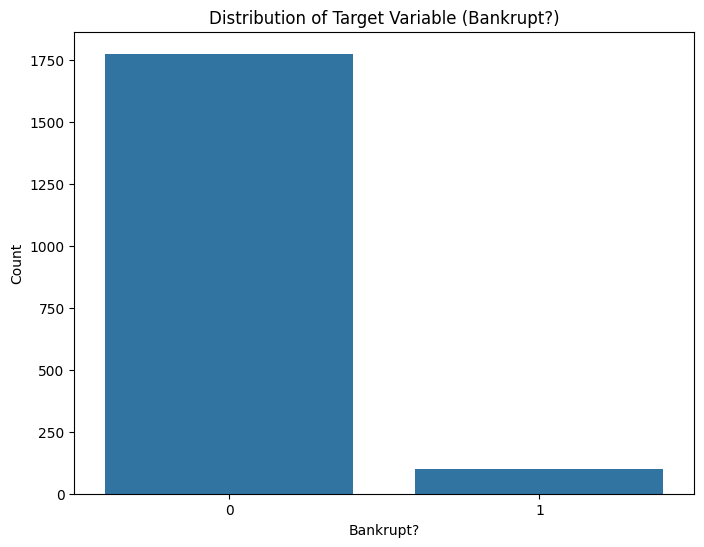

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Bankrupt?', data=data)
plt.title('Distribution of Target Variable (Bankrupt?)')
plt.xlabel('Bankrupt?')
plt.ylabel('Count')
plt.show()

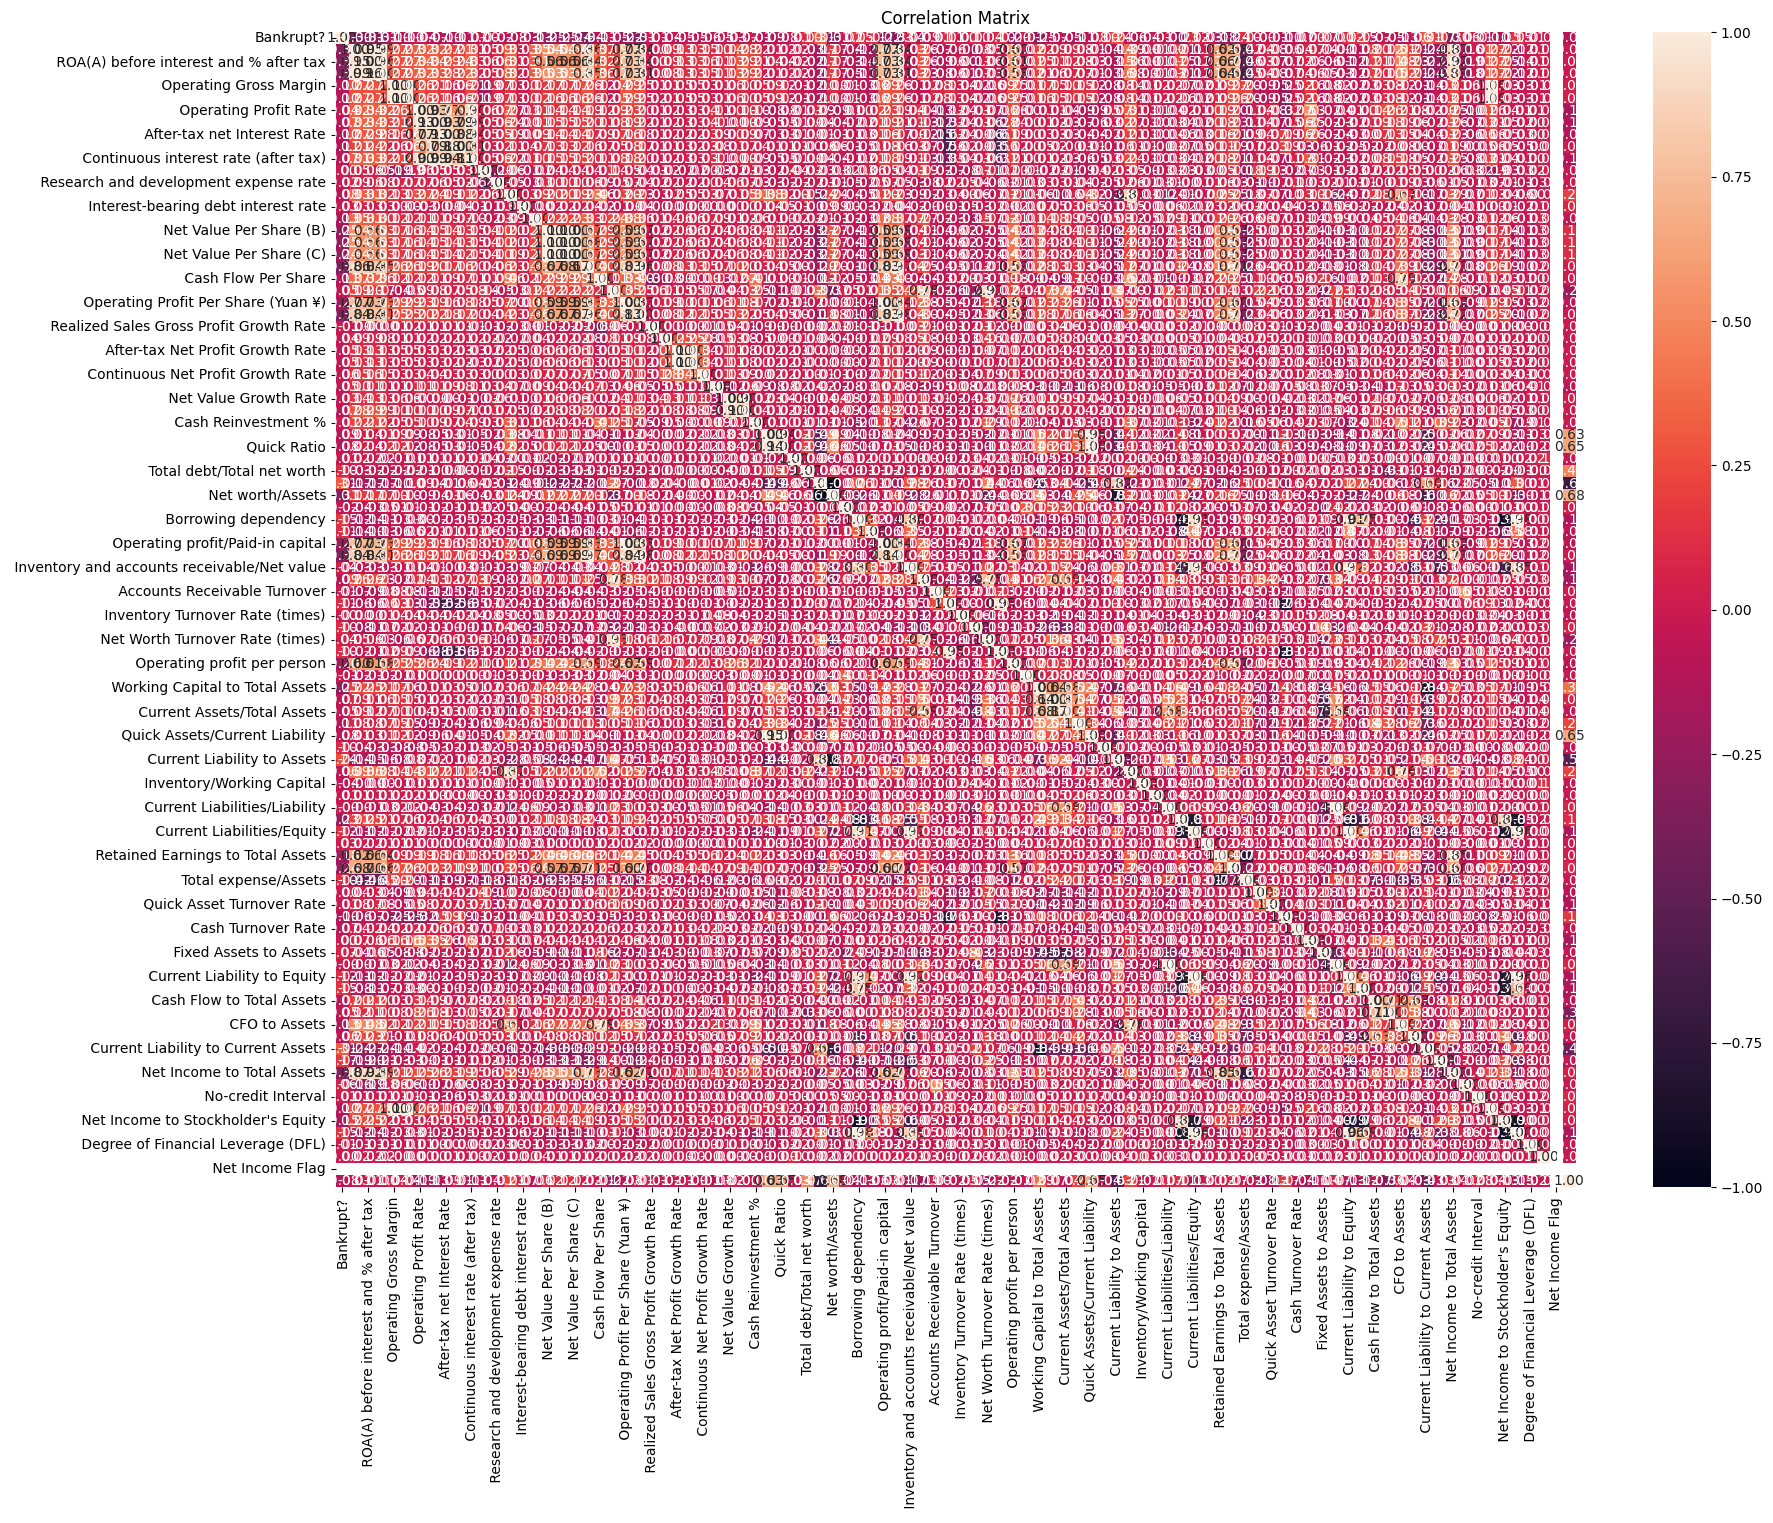

In [33]:
plt.figure(figsize=(20, 15))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
log_reg = LogisticRegression()

In [34]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [35]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [36]:
svc = SVC()
svc.fit(X_train_scaled, y_train)


SVC()

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [37]:
y_pred_log_reg = log_reg.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.9386666666666666
Confusion Matrix:
 [[346   9]
 [ 14   6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       355
           1       0.40      0.30      0.34        20

    accuracy                           0.94       375
   macro avg       0.68      0.64      0.66       375
weighted avg       0.93      0.94      0.93       375



In [38]:
y_pred_rf_clf = rf_clf.predict(X_test_scaled)
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_rf_clf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_clf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_clf))

Random Forest Classifier Accuracy: 0.9573333333333334
Confusion Matrix:
 [[352   3]
 [ 13   7]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       355
           1       0.70      0.35      0.47        20

    accuracy                           0.96       375
   macro avg       0.83      0.67      0.72       375
weighted avg       0.95      0.96      0.95       375



In [39]:
y_pred_svc = svc.predict(X_test_scaled)
print("Support Vector Classifier Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))
print("Classification Report:\n", classification_report(y_test, y_pred_svc))

Support Vector Classifier Accuracy: 0.9466666666666667
Confusion Matrix:
 [[355   0]
 [ 20   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       355
           1       0.00      0.00      0.00        20

    accuracy                           0.95       375
   macro avg       0.47      0.50      0.49       375
weighted avg       0.90      0.95      0.92       375



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


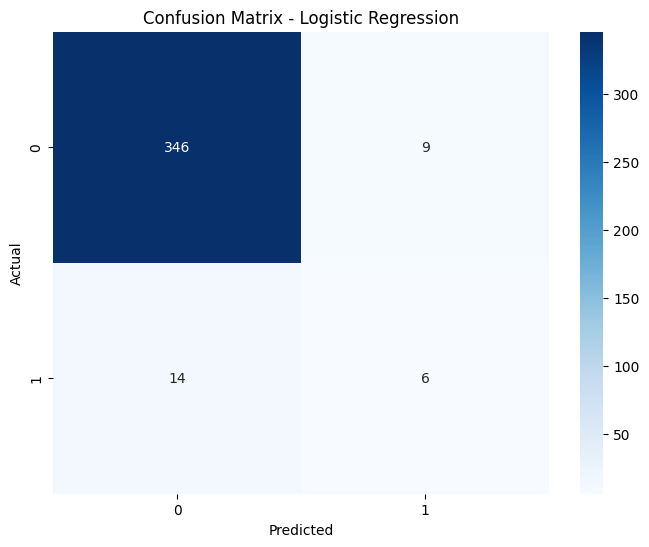

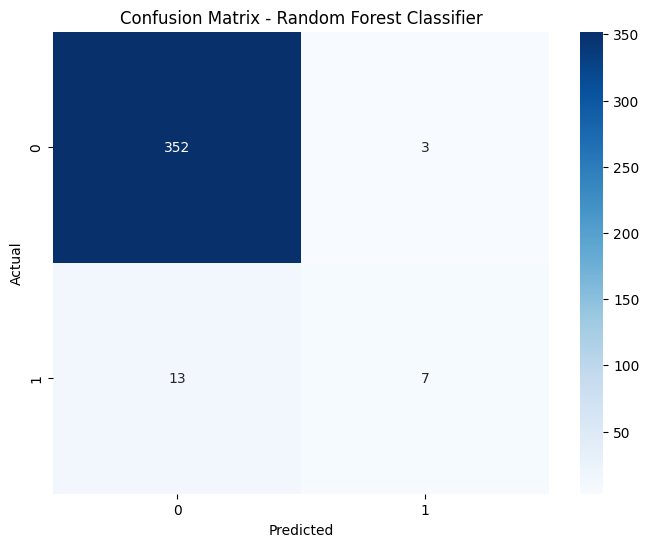

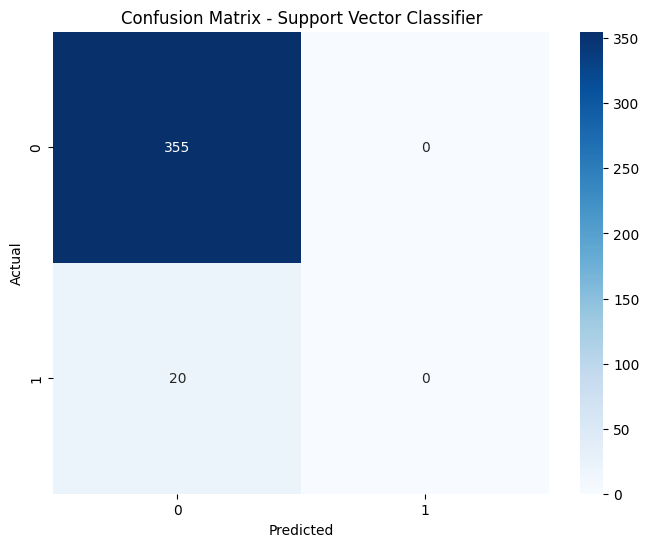

In [40]:
def plot_confusion_matrix(y_true, y_pred, title):
 cm = confusion_matrix(y_true, y_pred)
 plt.figure(figsize=(8, 6))
 sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
 plt.title(f'Confusion Matrix - {title}')
 plt.xlabel('Predicted')
 plt.ylabel('Actual')
 plt.show()
# Logistic Regression
plot_confusion_matrix(y_test, y_pred_log_reg, 'Logistic Regression')
# Random Forest Classifier
plot_confusion_matrix(y_test, y_pred_rf_clf, 'Random Forest Classifier')
# Support Vector Classifier
plot_confusion_matrix(y_test, y_pred_svc, 'Support Vector Classifier')
